<a href="https://colab.research.google.com/github/86lekwenshiung/Neural-Network-with-Tensorflow/blob/main/04_Transfer_Learning_with_Tensorflow_Part_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.0 Transfer Learning with Tensorflow Part 1 : Feature Extraction
___

Transfer Learning leverages a working model's exisiting architecture and learned patterns for our own problem.

2 main benefits:
  1. Leverage an existing neural network architecture proven to work on similiar , related problems.
  2. Leverage a working neural network architecture which has already learned patterns on similiar pattern on similiar data to our own , then we can adapt those pattern to our own.

<p align = 'center'>
  <img src = 'https://raw.githubusercontent.com/86lekwenshiung/Neural-Network-with-Tensorflow/main/images/04-transfer-learning-feature-extraction.png'>
</p>

### Import Libraries
___

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D , MaxPool2D , Flatten , Dense

import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import os
import zipfile
import pathlib

### Checking TF version and GPU
___

In [3]:
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))
!nvidia-smi

2.6.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Wed Aug 25 09:35:07 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8    30W / 149W |      3MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
               

# 1.0 Getting Data from kaggle(food101)
___

In [4]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip 

--2021-08-25 09:35:07--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 108.177.125.128, 142.251.8.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  97.1MB/s    in 1.7s    

2021-08-25 09:35:09 (97.1 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [5]:
# Unzip File
zip_ref = zipfile.ZipFile(file = '10_food_classes_10_percent.zip' , mode = 'r')

# Extract File
zip_ref.extractall()

# Close Zip
zip_ref.close()

### 1.1 Setting Up File Path
___

In [6]:
for dirpaths , dirnames , filenames in os.walk('10_food_classes_10_percent'):
  print(f'There are {len(filenames)} files and {len(dirnames)} folders in {dirpaths}')

There are 0 files and 2 folders in 10_food_classes_10_percent
There are 0 files and 10 folders in 10_food_classes_10_percent/train
There are 75 files and 0 folders in 10_food_classes_10_percent/train/chicken_wings
There are 75 files and 0 folders in 10_food_classes_10_percent/train/chicken_curry
There are 75 files and 0 folders in 10_food_classes_10_percent/train/grilled_salmon
There are 75 files and 0 folders in 10_food_classes_10_percent/train/steak
There are 75 files and 0 folders in 10_food_classes_10_percent/train/hamburger
There are 75 files and 0 folders in 10_food_classes_10_percent/train/sushi
There are 75 files and 0 folders in 10_food_classes_10_percent/train/pizza
There are 75 files and 0 folders in 10_food_classes_10_percent/train/fried_rice
There are 75 files and 0 folders in 10_food_classes_10_percent/train/ramen
There are 75 files and 0 folders in 10_food_classes_10_percent/train/ice_cream
There are 0 files and 10 folders in 10_food_classes_10_percent/test
There are 250

### 1.2 Setting Up File Directory
___

In [7]:
train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

### 1.3 Setting Up Class Names
___

In [8]:
"""
PurePath subclass that can make system calls.

Path represents a filesystem path but unlike PurePath, also offers 
methods to do system calls on path objects. Depending on your system,
instantiating a Path will return either a PosixPath or a WindowsPath
object. You can also instantiate a PosixPath or WindowsPath directly,
but cannot instantiate a WindowsPath on a POSIX system or vice versa.
"""

data_dir = pathlib.Path(train_dir)

for item in data_dir.glob('*'):
  print(item.name)

chicken_wings
chicken_curry
grilled_salmon
steak
hamburger
sushi
pizza
fried_rice
ramen
ice_cream


In [9]:
class_names = [item.name for item in data_dir.glob('*')]

### 1.4 Visualing Data
___

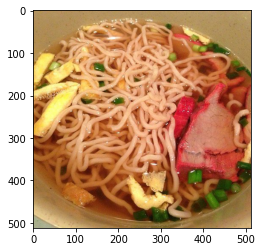

In [10]:
# How to Read Sample Image File From Directories

sample_path  = '/content/10_food_classes_10_percent/train/ramen'
random_image = random.choice(os.listdir(sample_path))

img = plt.imread(sample_path + '/' + random_image)
plt.imshow(img)

In [11]:
def view_random_image(target_dir , target_class):
  # File Path to Img
  file_path = target_dir + '/' + target_class

  # Random Image
  random_image = random.choice(os.listdir(file_path))

  img = plt.imread(file_path + '/' + random_image)
  plt.imshow(img)
  plt.title(f'{target_class} , {img.shape}')
  plt.axis(False)
  plt.xlabel(f'image shape: {img.shape}');

  return img

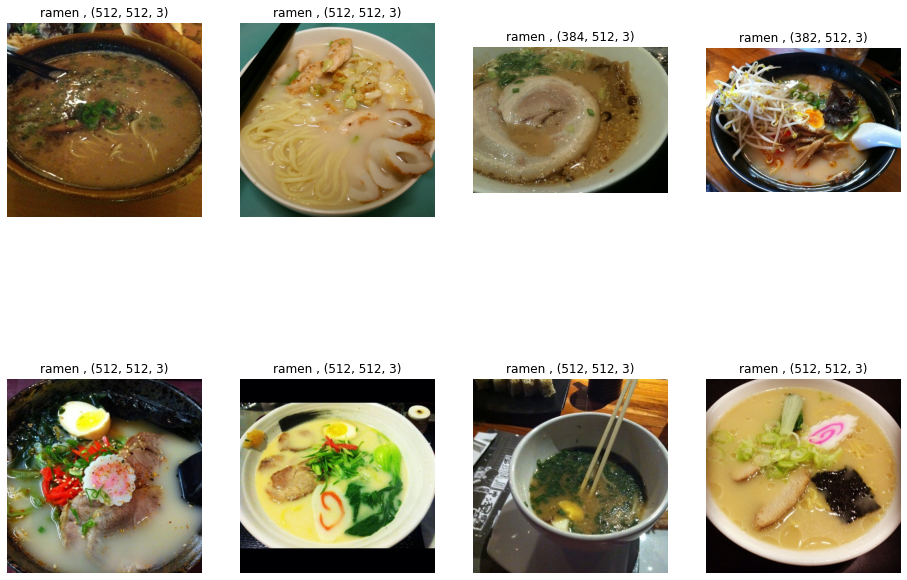

In [12]:
plt.figure(figsize = (16,12))
for i in range(8):
  plt.subplot(2,4,i+1)
  img = view_random_image(target_dir = '/content/10_food_classes_10_percent/train', 
                        target_class = 'ramen')

# 2.0 Building Baseline Model
___
1. Define Rescale function and file dir
2. Load and preprocess image
3. Build a model
4. Compile a model 
5. Fit the model and evaluating loss curves
6. Hyperparameter tuning , Augmenting Data

### 2.1 Define Rescale Function
___

In [13]:
img_shape = (224 , 224)
batch_size = 32

train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

train_data_10percent = train_datagen.flow_from_directory(directory = train_dir,
                                                        target_size = img_shape,
                                                        class_mode = 'categorical',
                                                        batch_size = batch_size)

test_data_10percent = test_datagen.flow_from_directory(directory = test_dir,
                                                       target_size = img_shape,
                                                       class_mode = 'categorical',
                                                       batch_size = batch_size)

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 2.2 Setting Up Callbacks
___

More commonly used callbacks
1. [TensorBoard](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard)
2. EarlyStopping
3. Model checkpointing


|Callback name|User Case|Code|
|---|---|---|
|TensorBoard| Log the Performance of multiple models and then view and compares these models in a visual way on TensorBoard|tf.keras.callbacks.TensorBoard()|
|Model checkpointing| Save your model as it trains so ytou can stop training if needed and come back to continue off where you left. Helpful for long training time and can't be done in one sitting| tf.keras.callbacks.ModelCheckpoint|
|Early stopping| Leave your model for an arbitary amount of tiume and have it stop training automatically when it ceaes to improve. Helpful when there ia a large dtaasetr and don't know how long training will take.| tf.keras.callbacks.EarlyStopping()|

In [14]:
import datetime

def create_tensorboard_callback(dir_name , experiment_name):
  log_dir = dir_name + '/' +experiment_name +'/' +datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)
  print(f'Saving Tensorboard log files to {log_dir}')
  return tensorboard_callback

### 2.3 Getting Pretrained Model from Tensorflow Hub
___
* Pretrained model can be accessed on https://tfhub.dev/
* For this notebook example , we will uysed the following feature vectors for comparison:
  - https://tfhub.dev/google/imagenet/efficientnet/b0/feature-vector/1
  - https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4

In [15]:
# Tensorflow Hub Pre-trained Models
resnet_url = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5'
efficientnet_url = 'https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'

In [16]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras  import Sequential , layers

<p align = 'center'>
  <img src = https://raw.githubusercontent.com/86lekwenshiung/Neural-Network-with-Tensorflow/main/images/04-tensorflow_hub_model_usage.png>
  <p/>

In [17]:
def create_model(model_url , num_classes = 10):
  """
  Take a Tensorflow hub url and create a Keras Sequential.

  Args:
    model_url (str): A Tensorflow Hub Feature extraction url
    num_classes (int) : Number of output neurons in output layers, in this example , default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature extractor
    layer and Dense Output layer with num_classes output neurons

  """

  # Download pretrained model
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable = False,  # Freeze the already learned patterns
                                           input_shape = img_shape +(3,))
  
  model = tf.keras.Sequential([
                               feature_extractor_layer,
                               layers.Dense(num_classes , activation = 'softmax' , name = 'output_layer')
  ])

  return model

Using the Tensorflow Hub model , we freeze the pretrained layers for those in between. We changed the output layers from 1000 to 10 to suit to the example requirement.

<p align = 'center'>
  <img src = 'https://raw.githubusercontent.com/86lekwenshiung/Neural-Network-with-Tensorflow/main/images/04-resnet-feature-extractor.png'>

Source : https://github.com/mrdbourke/tensorflow-deep-learning
<p/>

### 2.4 Creating Resnet Model
___

In [18]:
# Create Resnet Model from function
resnet_model = create_model(resnet_url , train_data_10percent.num_classes)

In [19]:
resnet_model.compile(optimizer = tf.keras.optimizers.Adam(),
                     loss = tf.keras.losses.CategoricalCrossentropy(),
                     metrics = 'accuracy')

In [20]:
# Create Renset Callback
callback = create_tensorboard_callback('tensorflow_hub' , 'resnet50v2')

Saving Tensorboard log files to tensorflow_hub/resnet50v2/20210825-093527


In [21]:
resnet_history = resnet_model.fit(train_data_10percent,
                                  batch_size = 32,
                                  epochs = 5,
                                  validation_data = test_data_10percent,
                                  steps_per_epoch = len(train_data_10percent),
                                  validation_steps = len(test_data_10percent),
                                  callbacks = [callback])

Epoch 1/5
24/24 [==============================] - 58s 1s/step - loss: 1.9467 - accuracy: 0.3667 - val_loss: 1.2404 - val_accuracy: 0.6092
Epoch 2/5
24/24 [==============================] - 22s 939ms/step - loss: 0.9283 - accuracy: 0.7147 - val_loss: 0.8520 - val_accuracy: 0.7248
Epoch 3/5
24/24 [==============================] - 22s 943ms/step - loss: 0.6421 - accuracy: 0.8187 - val_loss: 0.7835 - val_accuracy: 0.7412
Epoch 4/5
24/24 [==============================] - 22s 937ms/step - loss: 0.4913 - accuracy: 0.8707 - val_loss: 0.7286 - val_accuracy: 0.7592
Epoch 5/5
24/24 [==============================] - 22s 929ms/step - loss: 0.3974 - accuracy: 0.9133 - val_loss: 0.7087 - val_accuracy: 0.7612


In [22]:
def plot_loss(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['val_loss']))

  plt.figure(figsize = (12,8))

  #Plot Loss
  plt.subplot(1,2,1)
  plt.plot(epochs , loss , label = 'training loss')
  plt.plot(epochs , val_loss , label = 'validation loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  #Plot Accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs , accuracy , label = 'training accuracy')
  plt.plot(epochs , val_accuracy , label = 'validation accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

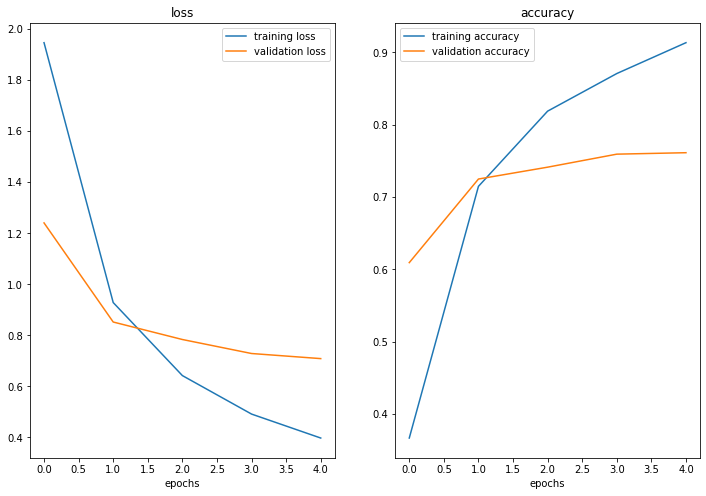

In [23]:
# With only 10% of our data , the transfer learning model already had a better accuracy of up til 0.7. Much better then our previous trial and error model in earlier notebooks.
# Though overfitted , but the validation score direction is heading the right direction.

plot_loss(resnet_history)

### 2.5 Creating EfficientNet Model
___

In [24]:
efficientnet_model = create_model(efficientnet_url , train_data_10percent.num_classes)

<p align = 'center'>
  <img src = 'https://raw.githubusercontent.com/86lekwenshiung/Neural-Network-with-Tensorflow/main/images/04-efficientnetb0-archi.png'>

Source : https://ai.googleblog.com/2019/05/efficientnet-improving-accuracy-and.html
<p/>

In [25]:
efficientnet_model.compile(optimizer = tf.keras.optimizers.Adam(),
                           loss = tf.keras.losses.CategoricalCrossentropy(),
                           metrics = 'accuracy')

efficientnet_callback = create_tensorboard_callback('tensorflow_hub' , 'effnetb0')

efficientnet_history = efficientnet_model.fit(train_data_10percent,
                                              batch_size = 32,
                                              validation_data = test_data_10percent,
                                              epochs = 10,
                                              steps_per_epoch = len(train_data_10percent),
                                              validation_steps = len(test_data_10percent),
                                              callbacks = [efficientnet_callback])

Saving Tensorboard log files to tensorflow_hub/effnetb0/20210825-093809
Epoch 1/10
24/24 [==============================] - 33s 1s/step - loss: 1.8451 - accuracy: 0.4253 - val_loss: 1.2821 - val_accuracy: 0.7296
Epoch 2/10
24/24 [==============================] - 19s 820ms/step - loss: 1.0704 - accuracy: 0.7653 - val_loss: 0.8691 - val_accuracy: 0.8108
Epoch 3/10
24/24 [==============================] - 19s 816ms/step - loss: 0.7666 - accuracy: 0.8293 - val_loss: 0.7004 - val_accuracy: 0.8376
Epoch 4/10
24/24 [==============================] - 19s 814ms/step - loss: 0.6176 - accuracy: 0.8627 - val_loss: 0.6106 - val_accuracy: 0.8536
Epoch 5/10
24/24 [==============================] - 19s 810ms/step - loss: 0.5201 - accuracy: 0.8787 - val_loss: 0.5601 - val_accuracy: 0.8516
Epoch 6/10
24/24 [==============================] - 19s 811ms/step - loss: 0.4532 - accuracy: 0.9000 - val_loss: 0.5245 - val_accuracy: 0.8684
Epoch 7/10
24/24 [==============================] - 19s 817ms/step - loss

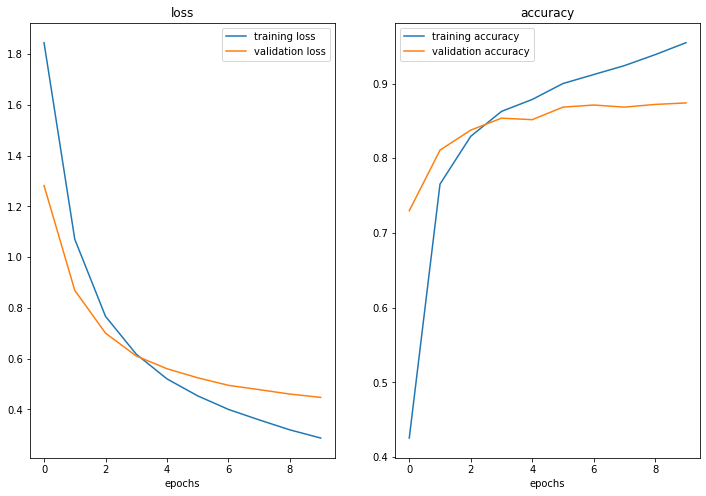

In [26]:
# Model does much better than our resnet model and much much better then our trial and error model from earlier notebooks.
# Model accuracy starts to plateau after the 5th epochs.
plot_loss(efficientnet_history)

### 2.6 Comparing Model Results Using TensorBoard
___

- [Format to upload to tensorboard.dev](https://colab.research.google.com/github/tensorflow/tensorboard/blob/master/docs/tbdev_getting_started.ipynb)
- Upload to Tensorboard.dev are publics. Do not upload sensitive data.

In [27]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 2048)              23564800  
_________________________________________________________________
output_layer (Dense)         (None, 10)                20490     
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [28]:
efficientnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              4049564   
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


In [ ]:
# Uploading model into tensorflow board
!tensorboard dev upload --logdir ./tensorflow_hub \
  --name "EfficientNetB0 vs ResNet50V5" \
  --description "Model Comparsion between 2 tensorhub model with 10% Data" \
  --one_shot

Done. View your TensorBoard at https://tensorboard.dev/experiment/FBGWD2zbRT6jh0OTmTys9w/

In [49]:
#Checking what Tensorboard Experiment one have
!tensorboard dev list

2021-08-25 09:54:41.101878: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-25 09:54:41.110307: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-25 09:54:41.110742: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
https://tensorboard.dev/experiment/FBGWD2zbRT6jh0OTmTys9w/
	Name                 EfficientNetB0 vs ResNet50V5
	Description          Model Comparsion between 2 tensorhub model with 10% Data
	Id                   FBGWD2zbRT6jh0OTmTys9w
	Created              2021-08-25 09:51:41 (3 minutes ago)
	Updated              2021-08-25 09:51:46 (3 min

In [ ]:
# Delete experiment
!tensorboard dev delete --experiment_id YOUR_EXPERIMENT_ID_HERE

# Recheck the deletion by checking on tensorboard dev list
!tensorboard dev list